# TREADMILL DATASET

### Business Problem

In [1]:
# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip

from scipy.stats import norm,geom,binom,poisson #probability distribution
from scipy.stats import ttest_1samp,ttest_ind # numerical vs categorical data-->categories <=2
from scipy.stats import f_oneway # numerical vs categorical data--> categories > 2
from scipy.stats import chi2_contingency, chi2,chisquare # categorical vs categorical
from scipy.stats import pearsonr , spearmanr
from scipy.stats import shapiro,boxcox,levene,kruskal
from statsmodels.graphics.gofplots import qqplot

Importing the Treadmill dataset

In [3]:
treadmill_df = pd.read_csv("C:/Users/Ashish/Desktop/DSML/jupyter_working_directory/aerofit.csv")

In [4]:
treadmill_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## 1. Basic analysis

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
5   KP281   20  Female         14     Partnered      3        3   32973     66
6   KP281   21  Female         14     Partnered      3        3   35247     75
7   KP281   21    Male         13        Single      3        3   32973     85
8   KP281   21    Male         15        Single      5        4   35247    141
9   KP281   21  Female         15     Partnered      2        3   37521     85

Total number of rows    :180
Total number of columns :9
..........................................................................

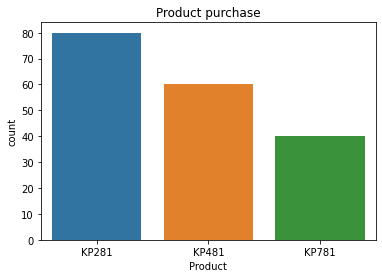

....................................................................................................
Usage per week
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64


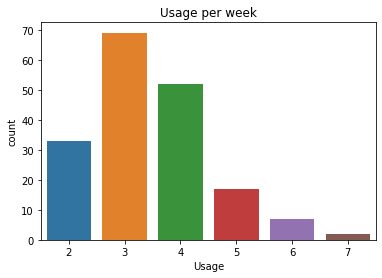

....................................................................................................


In [4]:
# 1.Reviewing data
print(treadmill_df.head(10))
print()

# 2. Total number of rows and columns
print(f'Total number of rows    :{treadmill_df.shape[0]}') 
print(f'Total number of columns :{treadmill_df.shape[1]}') 
print("."*100)
print()

# 3. Is there null values ?
print("Total no. of null values in each column")
print(treadmill_df.isna().sum())
print("."*100)
print()

# 4. Range of age group how are purchasing
print("Range of age group who are purchasing")
print(f'{treadmill_df.Age.min()} - {treadmill_df.Age.max()}')
print("."*100)
print()

# 5. Total no. of unique product and there id's ?
print("Total number of the unique products and there product id")
print(f'Total number of unique products : {treadmill_df.Product.nunique()}') 
print(f'Product id names : {treadmill_df.Product.unique()}') 
print("."*100)
print()

# 6. Graphical representation of product purchased.

print("Graphical representation of product purchased")
sns.countplot(data = treadmill_df,
             x = "Product")
plt.title("Product purchase",fontsize = 12)
plt.show()
print("."*100)

# 7. Graphical representation on the usage per week.
print("Usage per week")
print(f'{treadmill_df.Usage.value_counts()}')
sns.countplot(data = treadmill_df,
             x = "Usage")
plt.title("Usage per week",fontsize=12)
plt.show()
print("."*100)



## 2. Detecting outliers

1 : VISUALIZATION 

(a) BOXPLOT 



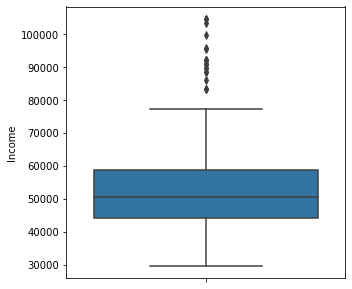

From the above Boxplot it is clear that the outlier will lie for all the value of income above 80000.
So the index of the outliers will be :- 

[159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179] 

Filtered dataset w.r.t to these outliers:- 

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
159   KP781   27    Male         16     Partnered      4        5   83416   
160   KP781   27    Male         18        Single      4        3   88396   
161   KP781   27    Male         21     Partnered      4        4   90886   
162   KP781   28  Female         18     Partnered      6        5   92131   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
168   KP781   30    Male         18     Partnered      5        4  103336   
169   KP781   30    

In [5]:
print("1 : VISUALIZATION \n")

# Method 1 -- BOXPLOT

print("(a) BOXPLOT \n")
plt.figure(figsize=(5,5,))
sns.boxplot(data = treadmill_df,
           y = "Income",
           orient="v")
plt.show()

print("From the above Boxplot it is clear that the outlier will lie for all the value of income above 80000.")
print("So the index of the outliers will be :- \n")
outlier_for_income = np.where(treadmill_df["Income"] > 80000)[0].tolist()
print(outlier_for_income ,"\n")
print("Filtered dataset w.r.t to these outliers:- \n")
#print(treadmill_df.filter(items = outlier_for_income , axis = 0))
print(treadmill_df[treadmill_df["Income"]>80000])

# Method 2 -- SCATTERPLOT
print("(a) SCATTERPLOT \n")


print("*"*100)
#.........................

print("2 : Z SCORE \n")

zscore_income = np.abs(stats.zscore(treadmill_df["Income"]))
threshold = 2 # it depends upon the busisness use case in this case we have taken 2
print(np.where(zscore_income > threshold )[0].tolist() ,"\n")
print("*"*100)

#.........................

print("3 : INTERQUARTILE RANGE \n")

Q1 =np.percentile(treadmill_df["Income"] , 25 , interpolation = "midpoint")
Q3 =np.percentile(treadmill_df["Income"] , 75 , interpolation = "midpoint")
IQR = Q3 - Q1

upper = np.where(treadmill_df["Income"] >= (Q3 + (1.5*IQR)))
lower = np.where(treadmill_df["Income"] <= (Q1 - (1.5*IQR)))
print(upper)
print(lower)

In [6]:
treadmill_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## 3. Effect of features on product purchased

1. Effect of marital status on total purchase
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


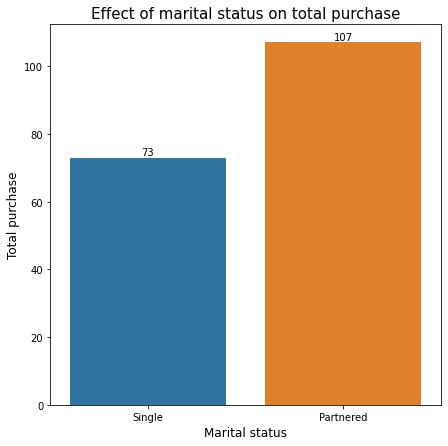

CONCLUSION : Patnered customers tend to buy more treadmill
**********************************************************************

2. Range of customers age who are purchasing maximum products


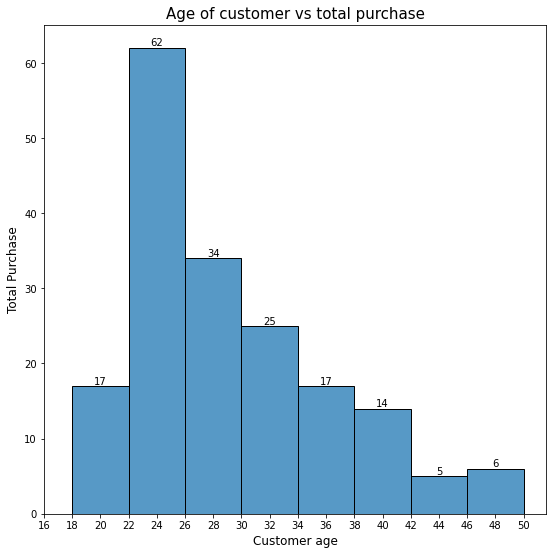

CONCLUSION : Customer with age group between 22-30 tend to purchase max treadmill
**********************************************************************

3. Customer income vs total purchase


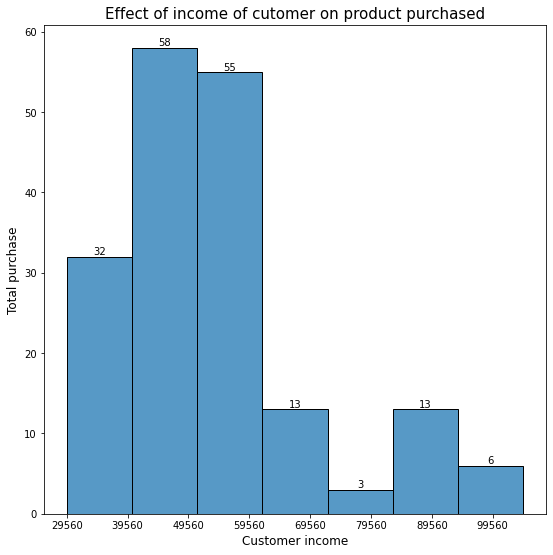

CONCLUSION : Customer with income between 30k to 60k tend to purchase most treadmill
**********************************************************************

4. Customer education vs total purchase


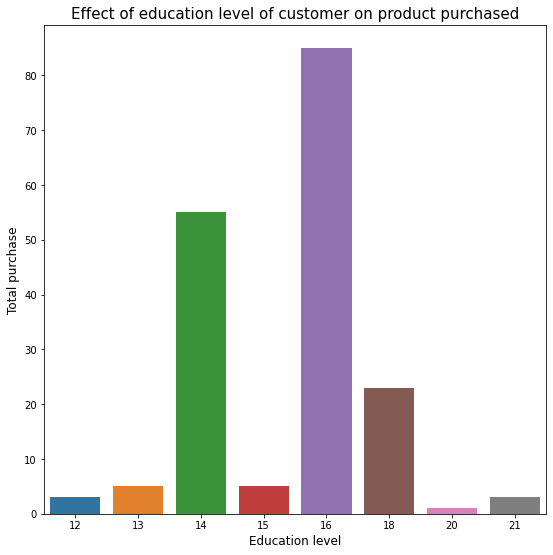

CONCLUSION : Customers with eductaion level 14 and 16 tend to purchase most treadmill
**********************************************************************

5.Gender vs total purchase


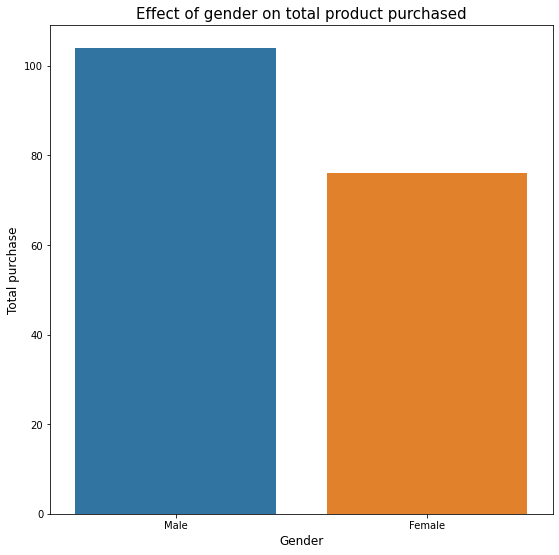

CONCLUSION : Male tend to purchase more treeadmill
**********************************************************************



In [7]:
# 1 . Effect of marital status on total products

print("1. Effect of marital status on total purchase")
print(f'{treadmill_df.MaritalStatus.value_counts()}')

plt.figure(figsize=(7,7))
effect_of_marital_status =sns.countplot(data = treadmill_df,
                                         x = "MaritalStatus")
effect_of_marital_status.set_xlabel("Marital status" , fontsize = 12)
effect_of_marital_status.set_ylabel("Total purchase" , fontsize = 12)
effect_of_marital_status.set_title("Effect of marital status on total purchase" , fontsize = 15)
for i in effect_of_marital_status.containers:
    effect_of_marital_status.bar_label(i,)
plt.show()
print("CONCLUSION : Patnered customers tend to buy more treadmill")
print("*"*70)
print()

# 2 . Range of age of customers who are purchasing maximum products 

print("2. Range of customers age who are purchasing maximum products")

plt.figure(figsize=(9, 9))
effect_of_age =sns.histplot(data = treadmill_df,
                                    x = "Age",
                                    bins = 8)
start = treadmill_df["Age"].min() - 2
end = treadmill_df["Age"].max() + 2

effect_of_age.set_xlabel("Customer age" , fontsize = 12)
effect_of_age.set_ylabel("Total Purchase" , fontsize = 12)
effect_of_age.set_title("Age of customer vs total purchase" , fontsize = 15)
effect_of_age.set_xticks(range(start , end ,2))

for i in effect_of_age.containers:
    effect_of_age.bar_label(i,)
plt.show()
    
print("CONCLUSION : Customer with age group between 22-30 tend to purchase max treadmill")    
    
print("*"*70)
print()

'''

# 3. Effect of customer age on type of products being sold. 

print("3. Effect of customer age on type of products being sold")

plt.figure(figsize=(6,6))
sns.boxplot( data = treadmill_df,
             x = "Product",
             y = "Age",
           )

plt.show()
print("CONCLUSION : ")
print("*"*70)
print()'''

# 3 . Range of income of customer who are purchasing max products

print("3. Customer income vs total purchase")

plt.figure(figsize=(9, 9))
effect_of_income =sns.histplot(data = treadmill_df,
                                      x = "Income",
                                       bins = 7,
                                        )
start = treadmill_df["Income"].min() - 2
end = treadmill_df["Income"].max() + 2

effect_of_income.set_xlabel("Customer income" , fontsize = 12)
effect_of_income.set_ylabel("Total purchase" , fontsize = 12)
effect_of_income.set_title("Effect of income of cutomer on product purchased" , fontsize = 15)
effect_of_income.set_xticks(range(start , end ,10000))

for i in effect_of_income.containers:
    effect_of_income.bar_label(i,)
    
plt.show()
    
print("CONCLUSION : Customer with income between 30k to 60k tend to purchase most treadmill")
print("*"*70)
print()

'''# 5. Effect of customer income on type of product being sold.

print("5. Effect of customer income on type of product being sold")    
plt.figure(figsize=(6,6))
sns.boxplot( data = treadmill_df,
             x = "Product",
             y = "Income",
           )
plt.show()
print("CONCLUSION : ")
print("*"*70)'''

# 4 . Education level of customer who are purchasing max products

print("4. Customer education vs total purchase")

plt.figure(figsize=(9, 9))
effect_of_edu =sns.countplot(data = treadmill_df,
                                      x = "Education",
                                       )
start = treadmill_df["Education"].min() - 2
end = treadmill_df["Education"].max() + 2

effect_of_edu.set_xlabel("Education level" , fontsize = 12)
effect_of_edu.set_ylabel("Total purchase" , fontsize = 12)
effect_of_edu.set_title("Effect of education level of customer on product purchased" , fontsize = 15)
#effect_of_edu.set_xticks(range(start , end ,10000))

for i in effect_of_income.containers:
    effect_of_edu.bar_label(i,)
    
plt.show()
    
print("CONCLUSION : Customers with eductaion level 14 and 16 tend to purchase most treadmill")
print("*"*70)
print()


# 5 . Effect of gender on total product purchased

print("5.Gender vs total purchase")

plt.figure(figsize=(9, 9))
effect_of_gen =sns.countplot(data = treadmill_df,
                                      x = "Gender",
                                       )

effect_of_gen.set_xlabel("Gender" , fontsize = 12)
effect_of_gen.set_ylabel("Total purchase" , fontsize = 12)
effect_of_gen.set_title("Effect of gender on total product purchased" , fontsize = 15)


for i in effect_of_income.containers:
    effect_of_gen.bar_label(i,)
    
plt.show()
    
print("CONCLUSION : Male tend to purchase more treeadmill")
print("*"*70)
print()


## 4. Calculating marginal and conditional Probabilities

In [8]:
# Calculating Marginal and conditional Probabilities

# total purchase
total_purchase = treadmill_df.shape[0]

# 1. Marginal

#product
product_valcount = treadmill_df["Product"].value_counts()
total_KP281_purchase =  product_valcount["KP281"]
total_KP481_purchase =  product_valcount["KP481"]
total_KP781_purchase =  product_valcount["KP781"]

#gender
gender_valcount = treadmill_df["Gender"].value_counts()
total_male_purchase =  gender_valcount["Male"]
total_female_purchase =  gender_valcount["Female"]

#maritalstatus
mar_status_valcount = treadmill_df["MaritalStatus"].value_counts()
total_single_purchase = mar_status_valcount["Single"]
total_partnered_purchase =  mar_status_valcount["Partnered"]

# 2. Conditional

# Product vs Gender crosstab
product_gen = pd.crosstab(index = treadmill_df["Product"] , columns = treadmill_df["Gender"] , margins = True)

# Product vs Marital status crosstab
product_maritalstatus = pd.crosstab(index = treadmill_df["Product"] , columns = treadmill_df["MaritalStatus"] , margins =True)

### 4.1 Marginal probability

### Approach 1

In [9]:
# Marginal probability

#1. Products

print("Calculating marginal probability\n")
print("A. Feature - Products\n")

# lets calculate marginal probabilities

print(f"Count on different products sold:\n")
print(f"{product_valcount}\n")

# 1.Probability of customer purchasing product with id - KP281
print("1. What is the probability of customer purchasing product with id - KP281 ?")
prob_KP281 = (total_KP281_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_KP281,2)}\n")

# 2.Probability of customer purchasing product with id - KP481
print("2. What is the probability of customer purchasing product with id - KP481 ?")
prob_KP481 = (total_KP481_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_KP481,2)}\n")

# 2.Probability of customer purchasing product with id - KP281
print("3. What is the probability of customer purchasing product with id - KP781 ?")
prob_KP781 = (total_KP781_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_KP781,2)}\n")

print("*" *70)

#...........................................................................................
# 2. Gender

print("B. Feature - Gender\n")

print(f"Count on purchases made on the basis of gender type:\n")
print(f"{gender_valcount}\n")

# 1.Probability of male purchasing the product.
print("1. What is the probability of male purchasing the product ?")
prob_male = (total_male_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_male,2)}\n")

# 2.Probability of female purchasing the product.
print("2. What is the probability of female purchasing the product ?")
prob_female = (total_female_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_female,2)}\n")

print("*" *70)

#...........................................................................................

# 3. Marital Status

print("C. Feature - MaritalStatus\n")

print(f"Count on purchases made on the basis of marital status:\n")
print(f"{mar_status_valcount}\n")

# 1.Probability of single customer purchasing the product.
print("1. What is the probability of partnered purchasing the product ?")
prob_single = (total_single_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_male,2)}\n")

# 2.Probability of partnered customer purchasing the product.
print("2. What is the probability of partnered customer purchasing the product ?")
prob_partnered = (total_partnered_purchase)/(total_purchase)
print(f"Probability = {np.round(prob_female,2)}\n")

print("*" *70)

Calculating marginal probability

A. Feature - Products

Count on different products sold:

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

1. What is the probability of customer purchasing product with id - KP281 ?
Probability = 0.44

2. What is the probability of customer purchasing product with id - KP481 ?
Probability = 0.33

3. What is the probability of customer purchasing product with id - KP781 ?
Probability = 0.22

**********************************************************************
B. Feature - Gender

Count on purchases made on the basis of gender type:

Male      104
Female     76
Name: Gender, dtype: int64

1. What is the probability of male purchasing the product ?
Probability = 0.58

2. What is the probability of female purchasing the product ?
Probability = 0.42

**********************************************************************
C. Feature - MaritalStatus

Count on purchases made on the basis of marital status:

Partnered    107
Single        73
N

### Approach 2

#### Approach 1 involves repeatation of similar steps which makes it lengthy , labourous and more chance of making mistake. 
#### In approch 2 we will be automating our task using the for loop.

In [10]:
# Marginal probability

#1. Products

print("A. Feature - Products\n")
print(f"Quantity of different type of products sold:\n")
print(f"{product_valcount}\n")
index=1 # for doing serial number

for product_id in treadmill_df["Product"].unique():
    print(f"{index}. What is the probability of customer purchasing product with id - {product_id} ?")
    prob = (product_valcount[product_id])/(total_purchase)
    print(f"Probability = {np.round(prob,2)}\n")
    index+=1

print("*"*70)    

#2. Gender

print("B. Feature - Gender\n")
print(f"Probability of each type of gender purchasing product:\n")
print(f"{gender_valcount}\n")
index=1 # for doing serial number

for gender in treadmill_df["Gender"].unique():
    print(f"{index}. What is the probability of customer purchasing product with gender type - {gender} ?")
    prob = (gender_valcount[gender])/(total_purchase)
    print(f"Probability = {np.round(prob,2)}\n")
    index+=1

print("*"*70)    
    
    
#3. Marital status

print("C. Feature - Marital status\n")
print(f"Quantity of different type of products purchased on the basis of marital status:\n")
print(f"{mar_status_valcount}\n")
index=1 # for doing serial number

for status in treadmill_df["MaritalStatus"].unique():
    print(f"{index}. What is the probability of customer purchasing product with Marital status - {status} ?")
    prob = (mar_status_valcount[status])/(total_purchase)
    print(f"Probability = {np.round(prob,2)}\n")
    index+=1

A. Feature - Products

Quantity of different type of products sold:

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

1. What is the probability of customer purchasing product with id - KP281 ?
Probability = 0.44

2. What is the probability of customer purchasing product with id - KP481 ?
Probability = 0.33

3. What is the probability of customer purchasing product with id - KP781 ?
Probability = 0.22

**********************************************************************
B. Feature - Gender

Probability of each type of gender purchasing product:

Male      104
Female     76
Name: Gender, dtype: int64

1. What is the probability of customer purchasing product with gender type - Male ?
Probability = 0.58

2. What is the probability of customer purchasing product with gender type - Female ?
Probability = 0.42

**********************************************************************
C. Feature - Marital status

Quantity of different type of products purchased on the basis of

### 4.2 Conditional probability

### Approach 1

In [11]:
# Conditional probability

#1. Products vs Gender

print("Calculating conditional probability\n")
print("A. Feature - Products Vs Gender\n")

# lets calculate conditional probabilities

print(f"Crosstab on different products sold vs gender type:\n")
print(f"{product_gen}\n")

# product vs male

# 1.Probability of purchasing product with id - KP281 provided customer is male.
print("1. What is the probability of purchasing product with id - KP281 provided customer is male?")
prob_KP281_male = (product_gen.loc["KP281"]["Male"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP281_male,2)}\n")

# 2.Probability of purchasing product with id - KP481 provided customer is male.
print("2. What is the probability of purchasing product with id - KP481 provided customer is male?")
prob_KP481_male = (product_gen.loc["KP481"]["Male"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP481_male,2)}\n")

# 3.Probability of purchasing product with id - KP781 provided customer is male.
print("3. What is the probability of purchasing product with id - KP781 provided customer is male?")
prob_KP781_male = (product_gen.loc["KP781"]["Male"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP781_male,2)}\n")

#product vs female

# 4.Probability of purchasing product with id - KP281 provided customer is female.
print("4. What is the probability of purchasing product with id - KP281 provided customer is female?")
prob_KP281_female = (product_gen.loc["KP281"]["Female"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP281_female,2)}\n")

# 5.Probability of purchasing product with id - KP481 provided customer is female.
print("5. What is the probability of purchasing product with id - KP481 provided customer is female?")
prob_KP481_female = (product_gen.loc["KP481"]["Female"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP481_female,2)}\n")

# 6.Probability of purchasing product with id - KP781 provided customer is female.
print("6. What is the probability of purchasing product with id - KP781 provided customer is female?")
prob_KP781_female = (product_gen.loc["KP781"]["Female"])/(product_gen.loc["All"]["Male"])
print(f"Probability = {np.round(prob_KP781_female,2)}\n")

Calculating conditional probability

A. Feature - Products Vs Gender

Crosstab on different products sold vs gender type:

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180

1. What is the probability of purchasing product with id - KP281 provided customer is male?
Probability = 0.38

2. What is the probability of purchasing product with id - KP481 provided customer is male?
Probability = 0.3

3. What is the probability of purchasing product with id - KP781 provided customer is male?
Probability = 0.32

4. What is the probability of purchasing product with id - KP281 provided customer is female?
Probability = 0.38

5. What is the probability of purchasing product with id - KP481 provided customer is female?
Probability = 0.28

6. What is the probability of purchasing product with id - KP781 provided customer is female?
Probability = 0.07



### Approach 2

#### Approach 1 involves repeatation of similar steps which makes it lengthy , labourous and more chance of making mistake. 
#### In approch 2 we will be automating our task using the for loop.

In [12]:
# Condtional probability

# 1. Product vs Gender

# Here we will be using product_gen crosstab that we have already created above to compute condtional probability.
print(f"A.) Product vs Gender crosstab \n\n{product_gen}\n")

index=1 # for doing serial number
for gender in treadmill_df["Gender"].unique(): # it will provide list of unique gender types
    for product_id in treadmill_df["Product"].unique(): # it will provide list of unique product id
        
        print(f"{index}. What is the probability of purchasing product with id - {product_id} provided customer is {gender}?")
        prob = (product_gen.loc[product_id][gender])/(product_gen.loc["All"][gender])
        print(f"Probability = {np.round(prob,2)}\n")
        index+=1

print("*"*70)

# 2. Product vs Marital status

# Here we will be using product_gen crosstab that we have already created above to compute condtional probability.
print(f"B.) Product vs Marital status crosstab \n\n{product_maritalstatus}\n")

index=1 # for doing serial number
for status in treadmill_df["MaritalStatus"].unique(): # it will provide list of unique gender types
    for product_id in treadmill_df["Product"].unique(): # it will provide list of unique product id
        
        print(f"{index}. What is the probability of purchasing product with id - {product_id} provided customer is {status}?")
        prob = (product_maritalstatus.loc[product_id][status])/(product_maritalstatus.loc["All"][status])
        print(f"Probability = {np.round(prob,2)}\n")
        index+=1
        

A.) Product vs Gender crosstab 

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180

1. What is the probability of purchasing product with id - KP281 provided customer is Male?
Probability = 0.38

2. What is the probability of purchasing product with id - KP481 provided customer is Male?
Probability = 0.3

3. What is the probability of purchasing product with id - KP781 provided customer is Male?
Probability = 0.32

4. What is the probability of purchasing product with id - KP281 provided customer is Female?
Probability = 0.53

5. What is the probability of purchasing product with id - KP481 provided customer is Female?
Probability = 0.38

6. What is the probability of purchasing product with id - KP781 provided customer is Female?
Probability = 0.09

**********************************************************************
B.) Product vs Marital status crosstab 

MaritalStatus  

## Conducting statistical tests

### 1. Continous vs categorical data

In [13]:
significance_value = 0.05 # I have considered significance value as 0.05.

1 - Income vs Product
Effect of Income on type of treadmill being purchased




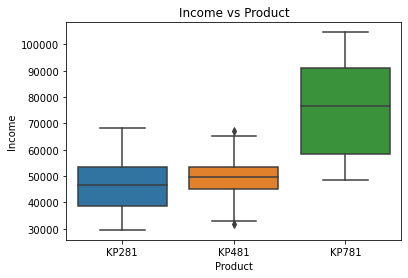

Null hypothesis - Income does not effect the type Product being sold. Observed differences in the sample means are due to random sampling variability.
Alternate hypothesis - Income effect the type Product being sold.There is a real, non-random difference among the means of the groups.

B1.Testing Normality assumption for each group

Q-Q plot for group to visualize whether the distribution of Income in different Product group follows normal distribution
--> Q-Q plot for group 1


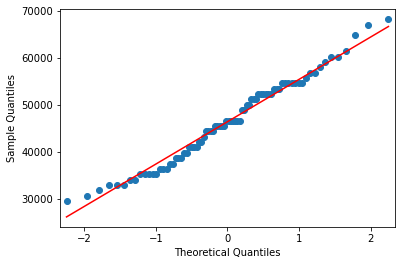

Conducting Shapiro test to quantify our intuition
p value: 0.1489071249961853
Data is Gaussian

--> Q-Q plot for group 2


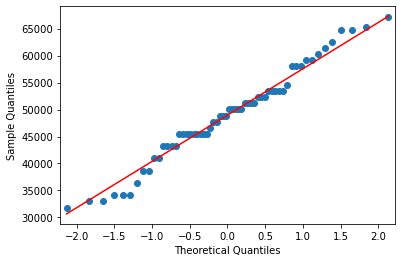

Conducting Shapiro test to quantify our intuition
p value: 0.2503264844417572
Data is Gaussian

--> Q-Q plot for group 3


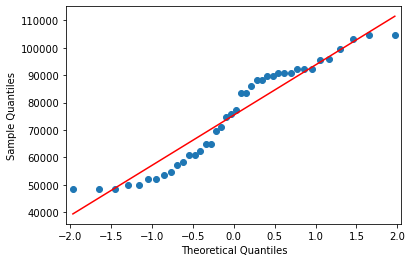

Conducting Shapiro test to quantify our intuition
p value: 0.004605021793395281
Distribution for the group is not Gaussian
Let us try to transform it to normal distribution using Boxcox.

Q-Q plot for transformed distribution


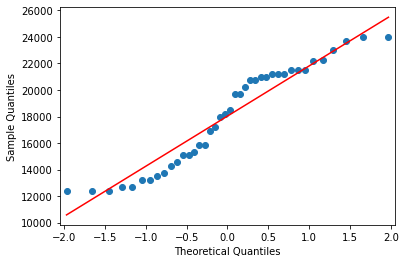


Again conducting Shapiro test to quantify our intuition
p_value: 0.004605021793395281
Transformed data is not Gaussian

Kruskal --> Product vs Income
As this group does not follow a Gaussian distribution, we can't do ANOVA
We will perform Kruskal test for Product vs Income
p value: 4.562357014275808e-14
Reject H0
Income affects the type of product being purchase

****************************************************************************************************
2 - Miles vs Product
Effect of Miles on type of treadmill being purchased




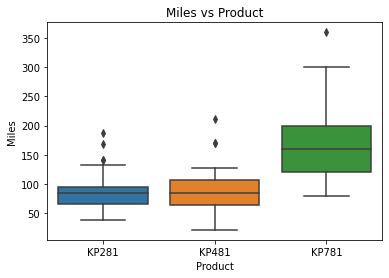

Null hypothesis - Miles does not effect the type Product being sold. Observed differences in the sample means are due to random sampling variability.
Alternate hypothesis - Miles effect the type Product being sold.There is a real, non-random difference among the means of the groups.

B1.Testing Normality assumption for each group

Q-Q plot for group to visualize whether the distribution of Miles in different Product group follows normal distribution
--> Q-Q plot for group 1


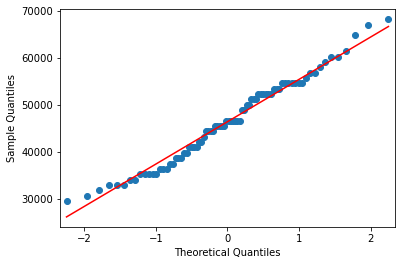

Conducting Shapiro test to quantify our intuition
p value: 0.1489071249961853
Data is Gaussian

--> Q-Q plot for group 2


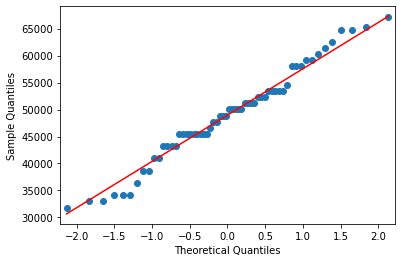

Conducting Shapiro test to quantify our intuition
p value: 0.2503264844417572
Data is Gaussian

--> Q-Q plot for group 3


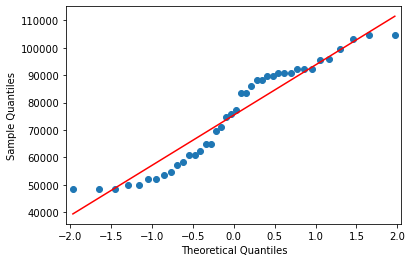

Conducting Shapiro test to quantify our intuition
p value: 0.004605021793395281
Distribution for the group is not Gaussian
Let us try to transform it to normal distribution using Boxcox.

Q-Q plot for transformed distribution


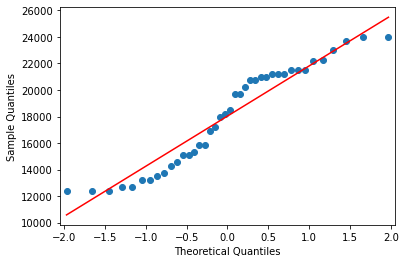


Again conducting Shapiro test to quantify our intuition
p_value: 0.004605021793395281
Transformed data is not Gaussian

Kruskal --> Product vs Miles
As this group does not follow a Gaussian distribution, we can't do ANOVA
We will perform Kruskal test for Product vs Miles
p value: 5.162101292718627e-63
Reject H0
Miles affects the type of product being purchase

****************************************************************************************************
3 - Age vs Product
Effect of Age on type of treadmill being purchased




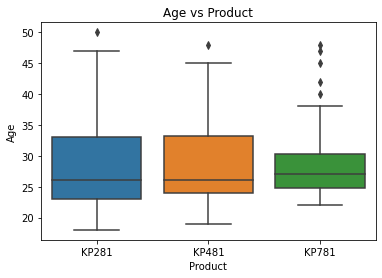

Null hypothesis - Age does not effect the type Product being sold. Observed differences in the sample means are due to random sampling variability.
Alternate hypothesis - Age effect the type Product being sold.There is a real, non-random difference among the means of the groups.

B1.Testing Normality assumption for each group

Q-Q plot for group to visualize whether the distribution of Age in different Product group follows normal distribution
--> Q-Q plot for group 1


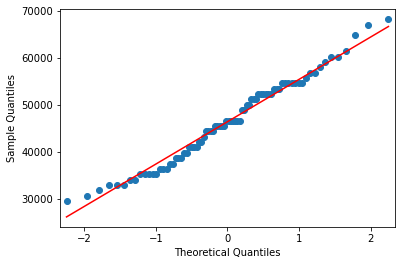

Conducting Shapiro test to quantify our intuition
p value: 0.1489071249961853
Data is Gaussian

--> Q-Q plot for group 2


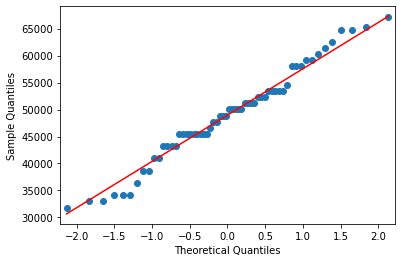

Conducting Shapiro test to quantify our intuition
p value: 0.2503264844417572
Data is Gaussian

--> Q-Q plot for group 3


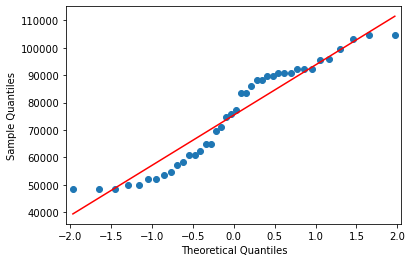

Conducting Shapiro test to quantify our intuition
p value: 0.004605021793395281
Distribution for the group is not Gaussian
Let us try to transform it to normal distribution using Boxcox.

Q-Q plot for transformed distribution


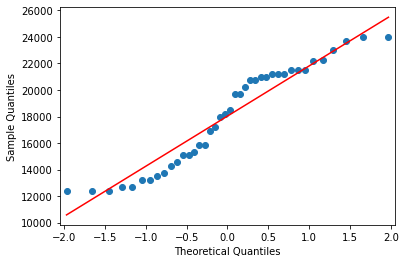


Again conducting Shapiro test to quantify our intuition
p_value: 0.004605021793395281
Transformed data is not Gaussian

Kruskal --> Product vs Age
As this group does not follow a Gaussian distribution, we can't do ANOVA
We will perform Kruskal test for Product vs Age
p value: 1.327324848899769e-100
Reject H0
Age affects the type of product being purchase

****************************************************************************************************


In [14]:
categorical = ["Product"]
continuos =  ["Income","Miles","Age"]

# unique values in each category
index = 1

for cat in categorical:
    unique_val = treadmill_df[cat].unique()
    group = []
      
    for cont in continuos:
        print(f"{index} - {cont} vs {cat}")
        print(f"Effect of {cont} on type of treadmill being purchased\n\n")
    
        index+=1
        normal = 0
        var = 0
        
        # Box plot
        sns.boxplot(data = treadmill_df,
                    x = cat,
                    y = cont
        )
        plt.title(f"{cont} vs {cat}")
        plt.show()

        # Here we are creating groups
        for y in unique_val:
            group.append(treadmill_df[treadmill_df[cat] == y][cont])

        no_of_group = len(group)
        
        # Conducting statistical tests
        
        print(f"Null hypothesis - {cont} does not effect the type {cat} being sold. Observed differences in the sample means are due to random sampling variability.")
        print(f"Alternate hypothesis - {cont} effect the type {cat} being sold.There is a real, non-random difference among the means of the groups.\n")
        
        # A . Ttest
        
        if no_of_group == 2:
            
           
            '''
            Here groups are always greater than 3 we wont be conducting the ttest 
            
            Checking the asumption for the ttest
            1. Indepence of data points in the group
            2. Normality - the data within each group  --> QQ PLot ,  Shapiro
            3. Homogeneity of variances: the variances of the two groups being compared are approximately equal. 
            
            If the assumption fails we will go for Mann-Whitney U test or Welch's t test
            
            '''
            
        else:
            
        # B. ANOVA / Kruskal
        
            '''
            ANOVA assumption:
              1.Independence: The observations or data points within each group are assumed to be independent of each other.
              2.Normality: ANOVA assumes that the data within each group are approximately normally distributed.
              3.Homogeneity of variances: ANOVA assumes that the variances of the groups being compared are approximately equal.
            
            '''
            print("B1.Testing Normality assumption for each group\n")
            
            index1 = 1
            
            # B1. Normality
            print(f"Q-Q plot for group to visualize whether the distribution of {cont} in different {cat} group follows normal distribution")
            index1= 1
            for element in group:
                print(f"--> Q-Q plot for group {index1}")
                index1+=1
                qqplot(element, line='s')
                plt.show()

                # Shapiro-Wilk test
                print("Conducting Shapiro test to quantify our intuition")
                test_stat, p_value = shapiro(element)
                print(f"p value: {p_value}")

                if p_value < 0.05:
                    print(f"Distribution for the group is not Gaussian")
                    print(f"Let us try to transform it to normal distribution using Boxcox.\n")
        
                    # Box-cox transformation
                    transformed_dis = boxcox(element)[0]
                    print("Q-Q plot for transformed distribution")
                    qqplot(transformed_dis, line="s")
                    plt.show()
                    print()

                    # Shapiro-Wilk test 
                    print("Again conducting Shapiro test to quantify our intuition")
                    test_stat, p_value = shapiro(element)
                    print(f"p_value: {p_value}")
                    
                    if p_value < 0.05:
                        print("Transformed data is not Gaussian\n")
                
                        # Kruskal test          
                        print(f"Kruskal --> {cat} vs {cont}")
                        print("As this group does not follow a Gaussian distribution, we can't do ANOVA")
                        print(f"We will perform Kruskal test for {cat} vs {cont}")
                        kruskal_stat, p_value_kruskal = kruskal(*group)
                        print(f"p value: {p_value_kruskal}")
                          
                        if p_value_kruskal < 0.05:
                            print("Reject H0")
                            print(f"{cont} affects the type of product being purchase\n") 
                            break
                        else:
                            print("Fail to reject the null hypothesis")
                            print(f"{cont} does not affect the product purchase\n")
                            break
                else:
                    print("Data is Gaussian\n")
                    normal += 1
                    
            # B2 .Levene Test  
            # If all the group have normal distribution then only Levene test
              
            if normal == no_of_group:
                # B. Levene's test for homogeneity of variances assumption
                print("B2 .Conducting Levene's test for homogeneity of variances assumption\n")
                print("Levene's Test")
                statistic_levene, p_value_levene = levene(*group)

                print(f"p value: {p_value_levene}")

                if p_value < 0.05:
                    print("Variance is not homogeneous\n")
            
                    # C. Kruskal test as variance between the group is not the same
                    print("As variance between the group is not the same, we can't do ANOVA")
                    print("We will perform Kruskal test")              
                    kruskal_stat, p_value_kruskal = kruskal(*group)
                    print(f"p value: {p_value_kruskal}")
                    
                    if p_value_kruskal < 0.05:
                        print(f"{cont} affects the type of purchase\n")
                    else:
                        print(f"{cont} does not affect the product purchase\n") 
                else:
                    print("Variance is homogeneous\n")
                    var += 1
                          
            if var == 1 and normal == no_of_group:
                print("We have tested normailty and variance homogeneity")
                print("Therefore, we can conduct ANOVA\n")
                          
                # ANOVA
                f_stat, p_value = f_oneway(*group)
                print(f"f_stat: {f_stat}")
                print(f"p_value: {p_value}")
                alpha = 0.05
                
                if p_value < alpha:
                    print("Reject H0")
                    print(f"{cont} affect the product being purchased")

                else:
                    print("Fail to reject H0")
                    print(f"{cont} does not affect the product being purchased ")
                    
                    
            print("*" * 100)


## Categorical vs categorical

### chi2_contingency

1. Effect of Gender on Product



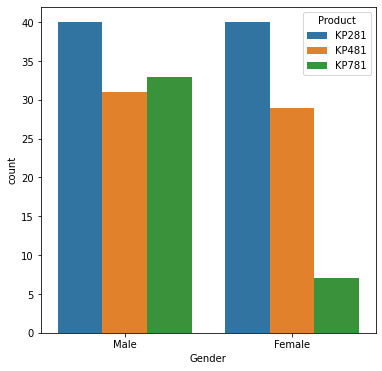

Null hypothesis - There is no association b/w Gender and Product. Both the variable are independent 
Alternate hypothesis - There is no association b/w Gender and Product. Both the variable are independent
Is Gender and Product are related ?

Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33
f_stat:12.923836032388664
p_value:0.0015617972833158714
Reject H0
Gender and Product are associated

****************************************************************************************************
2. Effect of MaritalStatus on Product



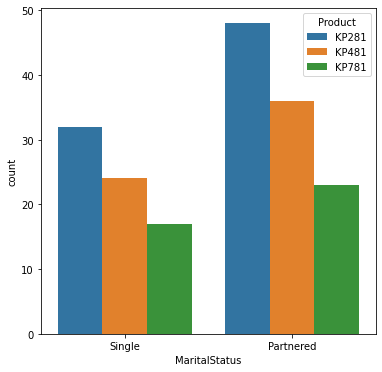

Null hypothesis - There is no association b/w MaritalStatus and Product. Both the variable are independent 
Alternate hypothesis - There is no association b/w MaritalStatus and Product. Both the variable are independent
Is MaritalStatus and Product are related ?

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17
f_stat:0.0806554858532839
p_value:0.9604745988058153
Fail to reject H0
MaritalStatus and Product are not associated

****************************************************************************************************


In [15]:
categorical_predic = ["Gender","MaritalStatus"]
categorical_predic2 = ["Product"]

index = 1# for serial number

predic_alr_comp = [] # list of predictor already compared
for predic in categorical_predic:
    predic_alr_comp.append(predic)
    
    for predic2 in categorical_predic2:
        if predic2 != predic and predic2 not in predic_alr_comp:
            print(f"{index}. Effect of {predic} on {predic2}\n")
            
            plt.figure(figsize=(6,6))
            sns.countplot( data = treadmill_df,
                           hue = predic2,
                            x = predic)
            plt.show()
            
            
            print(f"Null hypothesis - There is no association b/w {predic} and {predic2}. Both the variable are independent ")
            print(f"Alternate hypothesis - There is no association b/w {predic} and {predic2}. Both the variable are independent")         
            

    
            print(f"Is {predic} and {predic2} are related ?\n")
    
            crosstab = pd.crosstab(index=treadmill_df[predic2],columns = treadmill_df[predic])
            print(crosstab)

           
            f_stat, p_value , dof, exp_frq = chi2_contingency(crosstab)
        
            print(f"f_stat:{f_stat}")
            print(f"p_value:{p_value}")
        
            if p_value < significance_value:
                print("Reject H0")
                print(f"{predic} and {predic2} are associated\n")
            else:
                print("Fail to reject H0")
                print(f"{predic} and {predic2} are not associated\n")
            index+=1
            print("*"*100)
    
    

## Ordinal vs Categorical

1 - Usage vs Product 

Effect of Usage on type of treadmill being purchased




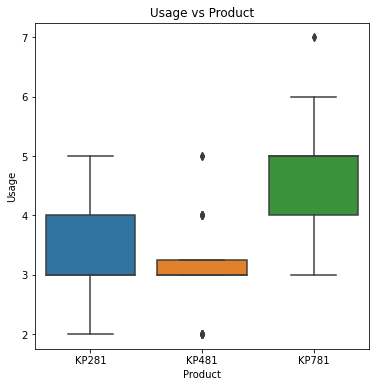

Kruskal --> Product vs Usage

Null hypothesis : hat there are no differences in the medians among the groups
Alternate hypothesis : there is at least one group with a different median.

p value: 1.1814111370856494e-15
Reject H0
Usage affects the type of product being purchase

**********************************************************************

2 - Fitness vs Product 

Effect of Fitness on type of treadmill being purchased




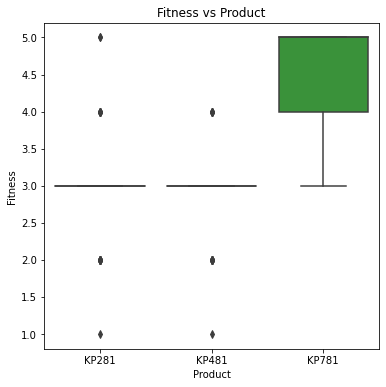

Kruskal --> Product vs Fitness

Null hypothesis : hat there are no differences in the medians among the groups
Alternate hypothesis : there is at least one group with a different median.

p value: 1.3482277705259005e-31
Reject H0
Fitness affects the type of product being purchase

**********************************************************************

3 - Education vs Product 

Effect of Education on type of treadmill being purchased




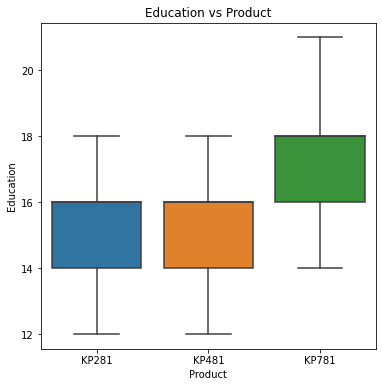

Kruskal --> Product vs Education

Null hypothesis : hat there are no differences in the medians among the groups
Alternate hypothesis : there is at least one group with a different median.

p value: 1.4199775502325436e-90
Reject H0
Education affects the type of product being purchase

**********************************************************************



In [16]:
categorical = ["Product"]
ordinal =  ["Usage","Fitness",'Education']

# unique values in each category
index = 1

for cat in categorical:
    unique_val = treadmill_df[cat].unique()
    group1 = []
      
    for ord in ordinal:
        print(f"{index} - {ord} vs {cat} \n")
        print(f"Effect of {ord} on type of treadmill being purchased\n\n")
    
        index+=1
        normal = 0
        var = 0
        
        # Box plot
        plt.figure(figsize = (6,6))
        sns.boxplot(data = treadmill_df,
                    x = cat,
                    y = ord
        )
        plt.title(f"{ord} vs {cat}")
        plt.show()

        # Here we are creating groups
        for y in unique_val:
            group1.append(treadmill_df[treadmill_df[cat] == y][ord])

        no_of_group = len(group1)
        
        # Conducting statistical tests
        
        
        # A . Mann-Whitney U test
        
        if no_of_group == 2:
            
           
            '''
            Here groups are always greater than 3 we wont be conducting the ttest 
            
            Checking the asumption for the Mann-Whitney test
                      
            If the assumption fails we will go for Mann-Whitney U test or Welch's t test
            
            '''
            
        else:
            # B. Kruskal Wallis
            print(f"Kruskal --> {cat} vs {ord}\n")
            
            print(f"Null hypothesis : hat there are no differences in the medians among the groups")            
            print(f"Alternate hypothesis : there is at least one group with a different median.\n")
            
            kruskal_stat, p_value_kruskal = kruskal(*group1)
            print(f"p value: {p_value_kruskal}")
                          
            if p_value_kruskal < 0.05:
                print("Reject H0")
                print(f"{ord} affects the type of product being purchase\n") 
                print("*" *70)
                print()
                
            else:
                print("Fail to reject the null hypothesis")
                print(f"{ord} does not affect the product purchase\n")
                print("*" *70)
                print()
        
        
        
        
            

## Correlation

## Continuos vs Continous 

### Pearsonr / Spearmanr

Income vs Miles
1. Effect of Income on Miles
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Income and Miles
Alternate hypothesis - There is linear relationship between Income and Miles 

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Income and Miles
Alternate hypothesis - There is linear relationship between Income and Miles 

Checking assumption for pearsonr
A. Linearity
A1 --> Regplot


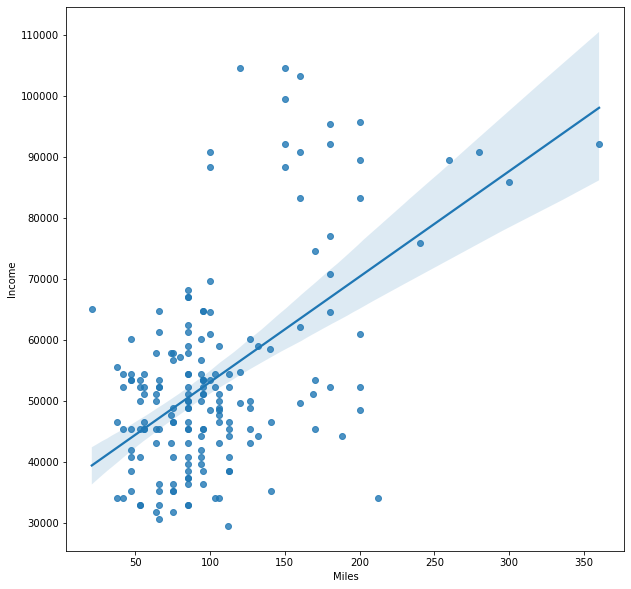

A2 - Examine residuals and check for violations of linearity


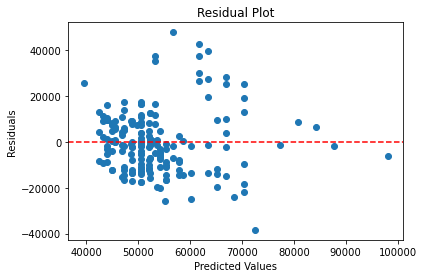

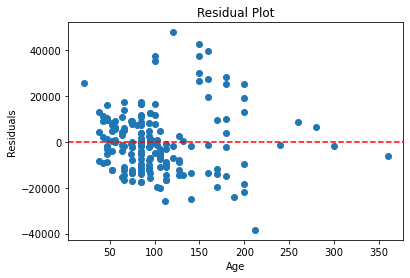

Q-Q plot to check normlaity for Income


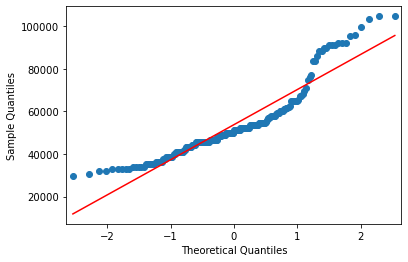

Conducting shapiro test to quantify our intuition
p value  : 2.720231009334384e-07
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


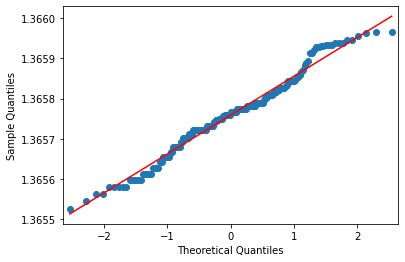


Again conducting shapiro to quantify our intuition
p value  : 5.576910808158253e-11
Transformed data is not Gaussian

Q-Q plot to check normlaity for Miles


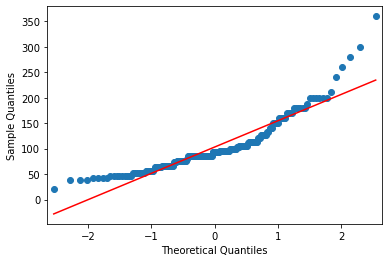

Conducting shapiro test to quantify our intuition
p value  : 1.3962301537162602e-08
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


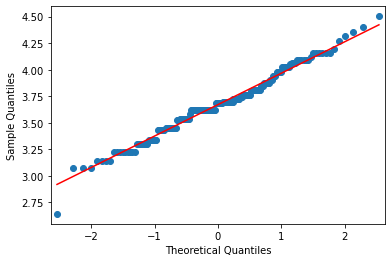


Again conducting shapiro to quantify our intuition
p value  : 8.576478069399762e-12
Transformed data is not Gaussian

Checking for Heteroscedasticity
Breusch-Pagan test p-value: 0.00985505093237501
Heteroscedasticity is present (reject the null hypothesis)
****************************************************************************************************
Income vs Age
1. Effect of Income on Age
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Income and Age
Alternate hypothesis - There is linear relationship between Income and Age 

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Income and Age
Alternate hypothesis - There is linear relationship between Income and Age 

Checking assumption for pearsonr
A. Linearity
A1 --> Regplot


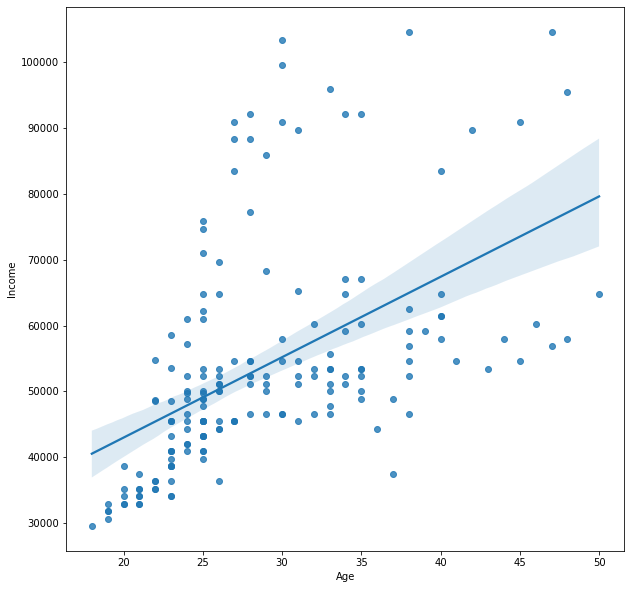

A2 - Examine residuals and check for violations of linearity


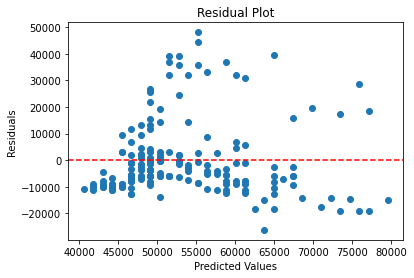

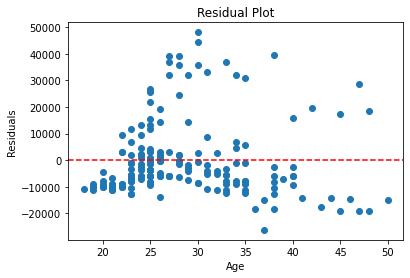

Q-Q plot to check normlaity for Income


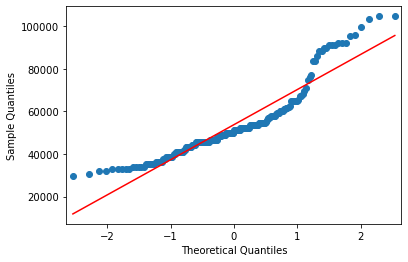

Conducting shapiro test to quantify our intuition
p value  : 1.0480572427695733e-06
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


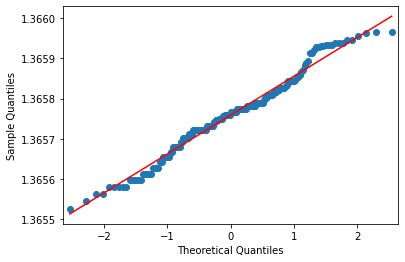


Again conducting shapiro to quantify our intuition
p value  : 5.576910808158253e-11
Transformed data is not Gaussian

Q-Q plot to check normlaity for Age


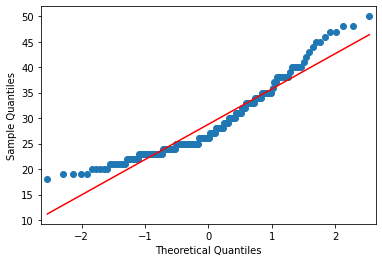

Conducting shapiro test to quantify our intuition
p value  : 4.889090996584855e-05
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


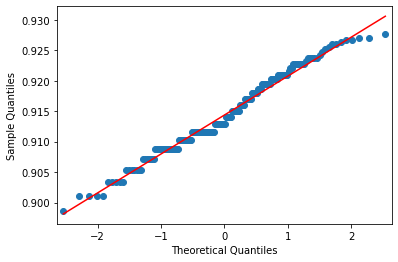


Again conducting shapiro to quantify our intuition
p value  : 1.182872200189422e-08
Transformed data is not Gaussian

Checking for Heteroscedasticity
Breusch-Pagan test p-value: 0.3795565323921827
Heteroscedasticity is not present (fail to reject the null hypothesis)
****************************************************************************************************
Miles vs Age
1. Effect of Miles on Age
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Miles and Age
Alternate hypothesis - There is linear relationship between Miles and Age 

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no linear relationship between Miles and Age
Alternate hypothesis - There is linear relationship between Miles and Age 

Checking assumption for pearsonr
A. Linearity
A1 --> Regplot


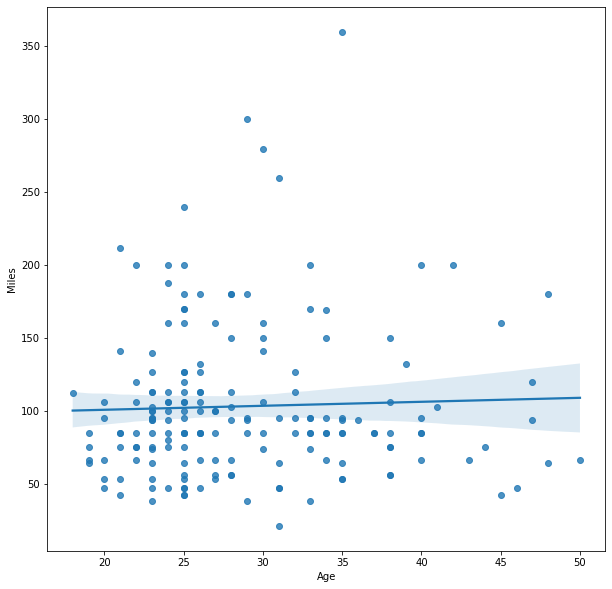

A2 - Examine residuals and check for violations of linearity


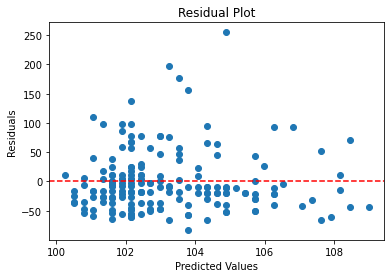

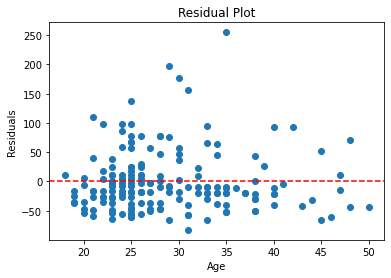

Q-Q plot to check normlaity for Miles


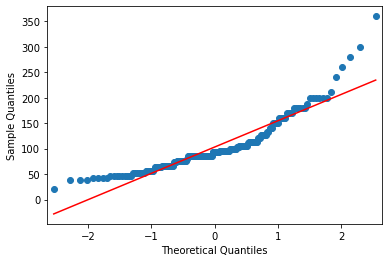

Conducting shapiro test to quantify our intuition
p value  : 9.882754170575936e-08
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


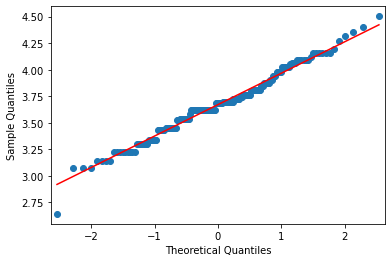


Again conducting shapiro to quantify our intuition
p value  : 8.576478069399762e-12
Transformed data is not Gaussian

Q-Q plot to check normlaity for Age


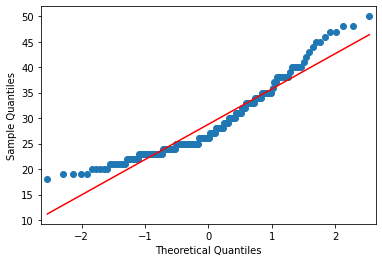

Conducting shapiro test to quantify our intuition
p value  : 7.824716703908052e-06
Distribution for is not Gaussian

Let us try to transform the distribution to normal using Boxcox


The transformed visual of the treadmill_kp781 distribution 


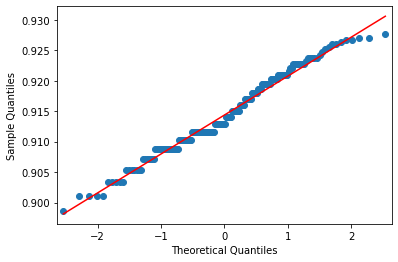


Again conducting shapiro to quantify our intuition
p value  : 1.182872200189422e-08
Transformed data is not Gaussian

Checking for Heteroscedasticity
Breusch-Pagan test p-value: 0.37516690134320274
Heteroscedasticity is not present (fail to reject the null hypothesis)
****************************************************************************************************


In [17]:
continuos_predic = ["Income","Miles","Age"] # continuos variables
index = 1# for serial number
predic_alr_comp = [] # list of predictor already compared

count = 0

for predic in continuos_predic:
    predic_alr_comp.append(predic)
    
    for predic2 in continuos_predic:
        if predic2 != predic and predic2 not in predic_alr_comp:
            print(f"{predic} vs {predic2}")
            print(f"{index}. Effect of {predic} on {predic2}")
            
            # Null and alternate hypothesis for pearsonr
            print("Null and alternate hypothesis for pearsonr")
            print(f"Null hypothesis - There is no linear relationship between {predic} and {predic2}")
            print(f"Alternate hypothesis - There is linear relationship between {predic} and {predic2} \n")
            
            # Null and alternate hypothesis for spearmanr
            print("Null and alternate hypothesis for pearsonr")
            print(f"Null hypothesis - There is no linear relationship between {predic} and {predic2}")
            print(f"Alternate hypothesis - There is linear relationship between {predic} and {predic2} \n")
                                        
            print("Checking assumption for pearsonr")
            
            # A. Linearity
            print("A. Linearity")
            
            # A1. regplot
            print("A1 --> Regplot")
            plt.figure(figsize=(10,10))
            sns.regplot( data = treadmill_df,
                           y = predic,
                            x = predic2)
            plt.show() 
            
            # A2. Examine residuals and check for violations of linearity
            print("A2 - Examine residuals and check for violations of linearity")
            ''' Assuming you have the variables 'income' as the dependent variable and 'age' 
            as the independent variable in your dataset'''
            # Step 1: Fit a linear regression model
            X = sm.add_constant(treadmill_df[predic2])
            model = sm.OLS(treadmill_df[predic], X)
            results = model.fit()
            # Step 2: Calculate the residuals
            residuals = results.resid
            # Step 3: Plot the residuals against the predicted values
            plt.scatter(results.fittedvalues, residuals)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title('Residual Plot')
            plt.show()
            # Step 4: Plot the residuals against the independent variable
            plt.scatter(treadmill_df[predic2], residuals)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel('Age')
            plt.ylabel('Residuals')
            plt.title('Residual Plot')
            plt.show()
            '''
            If the residual plot exhibits a random scatter around 0 with constant 
            variability and no obvious patterns or outliers, it suggests that the 
            linearity assumption is reasonable for your regression model. 
            However, if you observe any clear patterns, nonlinear trends, or violations
            of constant variability, it may indicate a violation of the linearity assumption.
            
            It's important to note that residual plots provide visual indications but are not 
            definitive tests of linearity. They serve as exploratory tools to help assess the 
            inearity assumption. In some cases, more advanced techniques, such as polynomial regression 
            or transformation of variables, may be needed to address nonlinearity.
            '''
                        
            # B .Normality
            
            # 1. Q-Q Plot
            group = [predic,predic2]            
            for element in group:
                print(f"Q-Q plot to check normlaity for {element}")
                qqplot(treadmill_df[element], line='s')
                plt.show()    
                # Shapiro-Wilk test
                print("Conducting shapiro test to quantify our intuition")
                test_stat , p_value = shapiro(treadmill_df[element].sample(100))
                print(f"p value  : {p_value}")            
                if p_value < 0.05:                
                    print(f"Distribution for is not Gaussian\n")
                    print(f"Let us try to transform the distribution to normal using Boxcox\n\n")        
                    # Box-cox tranformation
                    transformed_dis = boxcox(treadmill_df[element])[0]
                    print("The transformed visual of the treadmill_kp781 distribution ")
                    qqplot(transformed_dis,line ="s")
                    plt.show()
                    print()        
                    # Shapiro-wilk test 
                    print("Again conducting shapiro to quantify our intuition")
                    test_stat , p_value = shapiro(treadmill_df[element])
                    print(f"p value  : {p_value}")
                    if p_value < 0.05:
                        print(f"Transformed data is not Gaussian\n")
                  
                    else:
                        print("Transformed data is guassian")
                else:
                    print(f"Transformed data is Gaussian\n")
                    
                    
            # C . Heteroscedasticity
            print("Checking for Heteroscedasticity")

            # Assuming you have the variables "income" and "age" in your dataset

            data = treadmill_df
            # Step 1: Fit a regression model
            model = sm.OLS(treadmill_df[predic], sm.add_constant(treadmill_df[predic2]))
            results = model.fit()

            # Step 2: Obtain the residuals
            residuals = results.resid

            # Step 3: Fit a regression model using the residuals
            model_residuals = sm.OLS(residuals**2, sm.add_constant(treadmill_df[predic2]))
            results_residuals = model_residuals.fit()
 
            # Step 4: Perform the Breusch-Pagan test
            bp_test = sm.stats.diagnostic.het_breuschpagan(results_residuals.resid, results_residuals.model.exog)
            lm_p_value = bp_test[1]

            # Step 5: Print the test results
            print(f"Breusch-Pagan test p-value: {lm_p_value}")

            # Step 6: Interpret the test results
            significance_level = 0.05
            if lm_p_value < significance_level:
                print("Heteroscedasticity is present (reject the null hypothesis)")
            else:
                print("Heteroscedasticity is not present (fail to reject the null hypothesis)")
            
            #  if all the assuption satisfied we will go for pearsonr else spearmanr
            
            print("*"*100)  

    

1. Effect of Income on Age


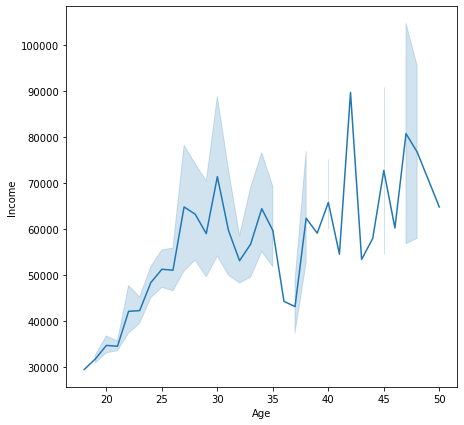

The line graph also shows the absence of linearty between Income and Age
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Income and Age
Alternate hypothesis - There is monotonic relationship between Income and Age 

Is Income and Age are related ?

spearman_stat:0.6831204242701145
p_value:4.392858060132461e-26
Reject H0
Income and Age have monotonic relationship between them.

****************************************************************************************************
2. Effect of Income on Miles


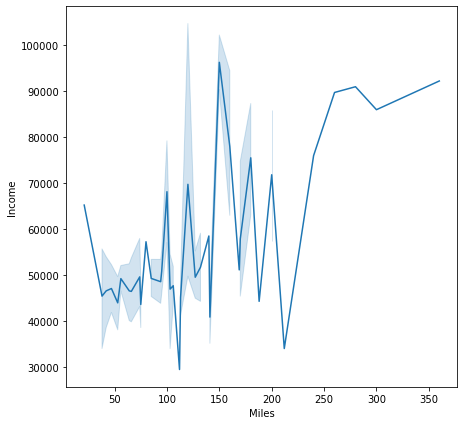

The line graph also shows the absence of linearty between Income and Miles
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Income and Miles
Alternate hypothesis - There is monotonic relationship between Income and Miles 

Is Income and Miles are related ?

spearman_stat:0.3567745210132342
p_value:8.831245322688909e-07
Reject H0
Income and Miles have monotonic relationship between them.

****************************************************************************************************
3. Effect of Age on Miles


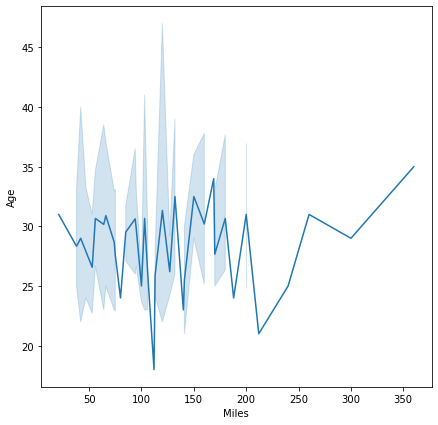

The line graph also shows the absence of linearty between Age and Miles
Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Age and Miles
Alternate hypothesis - There is monotonic relationship between Age and Miles 

Is Age and Miles are related ?

spearman_stat:0.025456620971026026
p_value:0.7344500293146397
Fail to reject H0
Age and Miles don't have monotonic relationship between them.

****************************************************************************************************


In [18]:
# As we can see from the above analysis:

# 1. Income vs miles --> distribution not guassian , linearity is not present ,Heteroscedasticity is present -->spearmanr
# 2. Income vs age   --> distribution not guassian , Linearity not present --> spearmanr
# 3. miles vs age    --> distribution not guassian , Linearity not present --> spearmanr

# As we can see in all the above 3 analysis all the asusmption is not met so we can't use pearsonr
# we will use spearmanr

continuos_cols = ['Income','Age','Miles']

index = 1# for serial number
predic_alr_comp = [] # list of predictor already compared
for predic in continuos_cols:
    predic_alr_comp.append(predic)
    
    for predic2 in continuos_cols:
        if predic2 != predic and predic2 not in predic_alr_comp:
            print(f"{index}. Effect of {predic} on {predic2}")
            index+=1
            
            plt.figure(figsize=(7,7))            
            #sns.set(style="whitegrid")
            sns.lineplot( data = treadmill_df,
                           x = predic2,
                            y = predic)
            
            plt.show()
            
            print(f"The line graph also shows the absence of linearty between {predic} and {predic2}")
            
            # Null and alternate hypothesis for spearmanr
            print("Null and alternate hypothesis for pearsonr")
            print(f"Null hypothesis - There is no monotonic relationship between {predic} and {predic2}")
            print(f"Alternate hypothesis - There is monotonic relationship between {predic} and {predic2} \n")
    
            print(f"Is {predic} and {predic2} are related ?\n")
    
        
            spearman_stat , p_value = spearmanr(treadmill_df[predic],treadmill_df[predic2])
        
            print(f"spearman_stat:{spearman_stat}")
            print(f"p_value:{p_value}")
            
            significance_value =0.05
        
            if p_value < significance_value:
                print("Reject H0")
                print(f"{predic} and {predic2} have monotonic relationship between them.\n")
                print("*"*100)
            else:
                print("Fail to reject H0")
                print(f"{predic} and {predic2} don't have monotonic relationship between them.\n")
                index+=1
                print("*"*100)

## Correlation heatmap

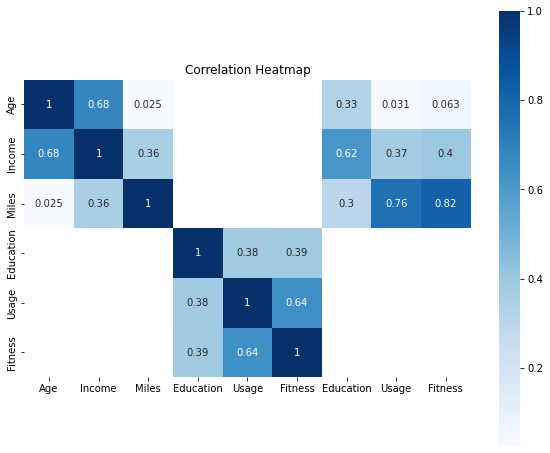

In [19]:
# Calculate Spearmanr correlation (as pearsonr assumption not met) for continuous vs continuous variables
continuous_cols = ['Age', 'Income', 'Miles']
continuous_corr = treadmill_df[continuous_cols].corr(method='spearman')

# Calculate Spearmanr correlation for ordinal vs ordinal variables
ordinal_cols = ['Education', 'Usage', 'Fitness']
ordinal_corr = treadmill_df[ordinal_cols].corr(method='spearman')

# Calculate Spearmanr correlation for continuous vs ordinal variables
ordinal_vs_continuous_corr = pd.DataFrame(index=continuous_cols, columns=ordinal_cols)
for continuous_col in continuous_cols:
    for ordinal_col in ordinal_cols:
        corr, _ = spearmanr(treadmill_df[continuous_col], treadmill_df[ordinal_col])
        ordinal_vs_continuous_corr.loc[continuous_col, ordinal_col] = corr
        
# Convert the data types to float
continuous_corr = continuous_corr.astype(float)
ordinal_corr = ordinal_corr.astype(float)
ordinal_vs_continuous_corr = ordinal_vs_continuous_corr.astype(float)

# Combine the correlation matrices
corr_matrix = pd.concat([continuous_corr, ordinal_corr, ordinal_vs_continuous_corr], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Continuos vs Ordinal --> spearmanr

1. Effect of Fitness on Age


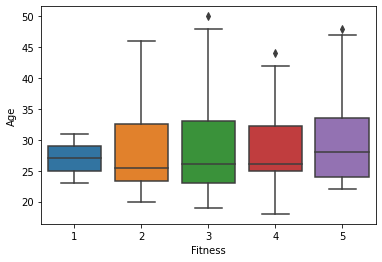


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Fitness and Age.
Alternate hypothesis - There is monotonic relationship between Fitness and Age. 

Is Fitness and Age are related ?

spearman_stat:0.0806554858532839
p_value:0.39875348562886914
Fail to reject H0
Fitness and Age do not have monotonic relationship between them.

****************************************************************************************************
2. Effect of Fitness on Income


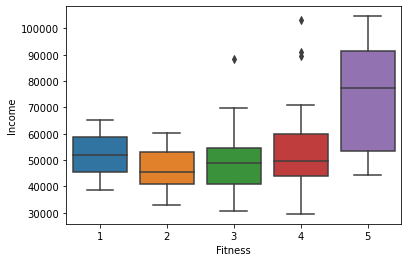


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Fitness and Income.
Alternate hypothesis - There is monotonic relationship between Fitness and Income. 

Is Fitness and Income are related ?

spearman_stat:0.0806554858532839
p_value:3.583426894781559e-08
Reject H0
Fitness and Income have monotonic relationship between them.

****************************************************************************************************
3. Effect of Fitness on Miles


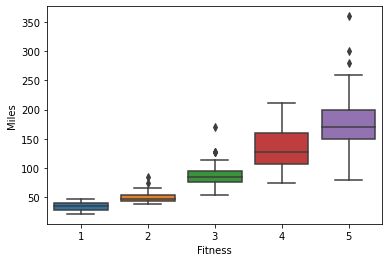


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Fitness and Miles.
Alternate hypothesis - There is monotonic relationship between Fitness and Miles. 

Is Fitness and Miles are related ?

spearman_stat:0.0806554858532839
p_value:3.0646977489144936e-44
Reject H0
Fitness and Miles have monotonic relationship between them.

****************************************************************************************************
4. Effect of Usage on Age


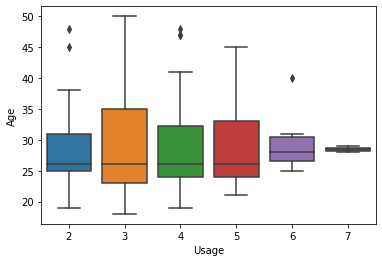


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Usage and Age.
Alternate hypothesis - There is monotonic relationship between Usage and Age. 

Is Usage and Age are related ?

spearman_stat:0.0806554858532839
p_value:0.6763039198477558
Fail to reject H0
Usage and Age do not have monotonic relationship between them.

****************************************************************************************************
5. Effect of Usage on Income


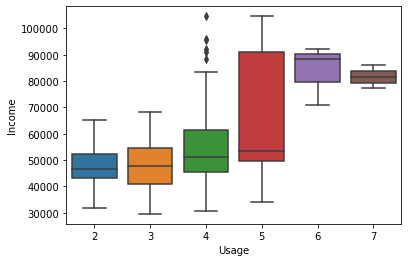


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Usage and Income.
Alternate hypothesis - There is monotonic relationship between Usage and Income. 

Is Usage and Income are related ?

spearman_stat:0.0806554858532839
p_value:2.529892587716116e-07
Reject H0
Usage and Income have monotonic relationship between them.

****************************************************************************************************
6. Effect of Usage on Miles


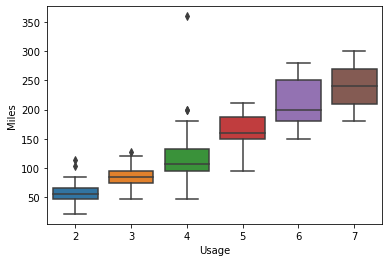


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Usage and Miles.
Alternate hypothesis - There is monotonic relationship between Usage and Miles. 

Is Usage and Miles are related ?

spearman_stat:0.0806554858532839
p_value:6.18615471176295e-35
Reject H0
Usage and Miles have monotonic relationship between them.

****************************************************************************************************
7. Effect of Education on Age


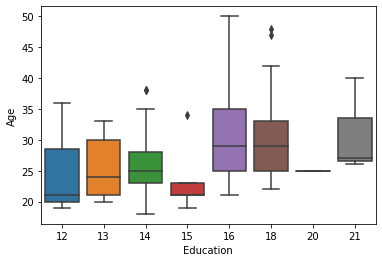


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Education and Age.
Alternate hypothesis - There is monotonic relationship between Education and Age. 

Is Education and Age are related ?

spearman_stat:0.0806554858532839
p_value:5.0134317012561816e-06
Reject H0
Education and Age have monotonic relationship between them.

****************************************************************************************************
8. Effect of Education on Income


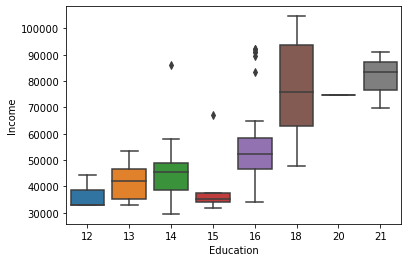


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Education and Income.
Alternate hypothesis - There is monotonic relationship between Education and Income. 

Is Education and Income are related ?

spearman_stat:0.0806554858532839
p_value:3.152435485880971e-20
Reject H0
Education and Income have monotonic relationship between them.

****************************************************************************************************
9. Effect of Education on Miles


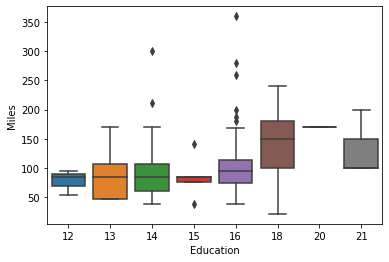


Null and alternate hypothesis for spearmanr
Null hypothesis - There is no monotonic relationship between Education and Miles.
Alternate hypothesis - There is monotonic relationship between Education and Miles. 

Is Education and Miles are related ?

spearman_stat:0.0806554858532839
p_value:4.1632361957042996e-05
Reject H0
Education and Miles have monotonic relationship between them.

****************************************************************************************************


In [20]:
continous_cols = ['Age','Income', 'Miles']
ordinal_cols = ['Fitness','Usage','Education']

index = 1 # for serial number
predic_alr_comp = [] # list of predictor already compared
for predic in ordinal_cols:
    #predic_alr_comp.append(predic)
    
    for predic2 in continous_cols:
        #if predic2 != predic and predic2 not in predic_alr_comp:
        print(f"{index}. Effect of {predic} on {predic2}")
        index+=1
        
        #plt.figure(figsize=(10,10))
        sns.boxplot( data = treadmill_df,
                           x = predic,
                            y = predic2)
        plt.show()
        print()
        
        # Null and alternate hypothesis for spearmanr
        print("Null and alternate hypothesis for spearmanr")
        print(f"Null hypothesis - There is no monotonic relationship between {predic} and {predic2}.")
        print(f"Alternate hypothesis - There is monotonic relationship between {predic} and {predic2}. \n")

    
        print(f"Is {predic} and {predic2} are related ?\n")
    
        
        spearman_stat , p_value = spearmanr(treadmill_df[predic],treadmill_df[predic2])
        
        print(f"spearman_stat:{f_stat}")
        print(f"p_value:{p_value}")
        
        if p_value < significance_value:
            print("Reject H0")
            print(f"{predic} and {predic2} have monotonic relationship between them.\n")
            print("*"*100)
        else:
            print("Fail to reject H0")
            print(f"{predic} and {predic2} do not have monotonic relationship between them.\n")
           
            print("*"*100)
    

## Ordinal vs Ordinal --> spearmanr

1. Effect of Fitness on Usage


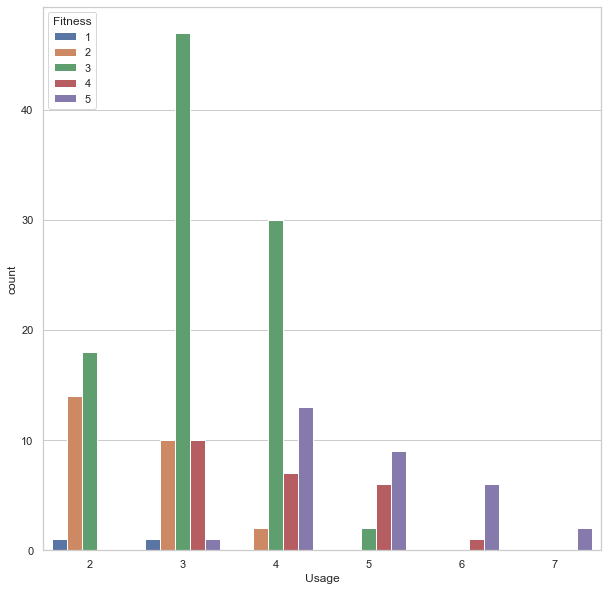

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Fitness and Usage
Alternate hypothesis - There is monotonic relationship between Fitness and Usage 

Is Fitness and Usage are related ?

spearman_stat:0.6438167889364454
p_value:1.8788994513251782e-22
Reject H0
Fitness and Usage have monotonic relationship between them.

****************************************************************************************************
2. Effect of Fitness on Education


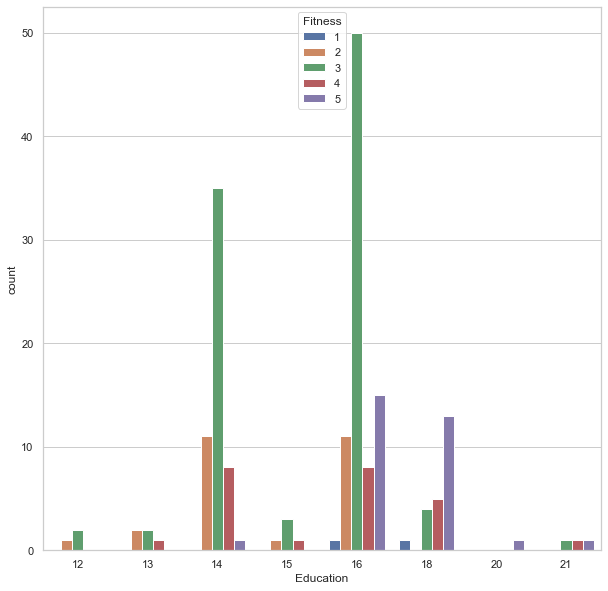

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Fitness and Education
Alternate hypothesis - There is monotonic relationship between Fitness and Education 

Is Fitness and Education are related ?

spearman_stat:0.390246372394476
p_value:6.111636210963602e-08
Reject H0
Fitness and Education have monotonic relationship between them.

****************************************************************************************************
3. Effect of Usage on Education


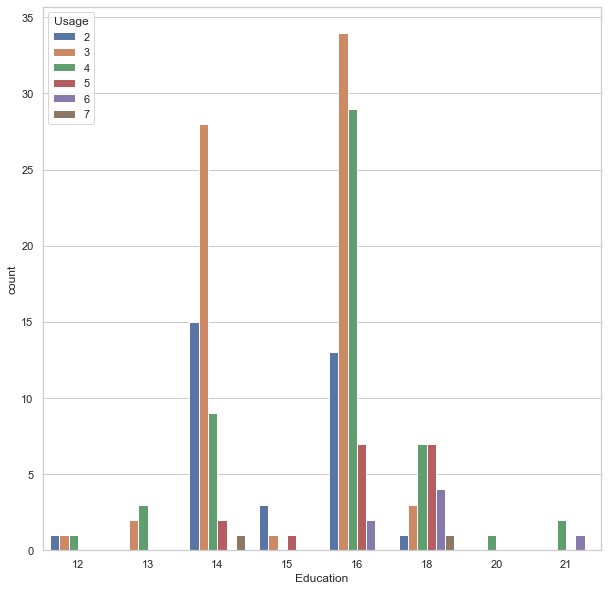

Null and alternate hypothesis for pearsonr
Null hypothesis - There is no monotonic relationship between Usage and Education
Alternate hypothesis - There is monotonic relationship between Usage and Education 

Is Usage and Education are related ?

spearman_stat:0.3803209079435281
p_value:1.3924608553069427e-07
Reject H0
Usage and Education have monotonic relationship between them.

****************************************************************************************************


In [21]:
ordinal_cols = ['Fitness','Usage','Education']

index = 1# for serial number
predic_alr_comp = [] # list of predictor already compared
for predic in ordinal_cols:
    predic_alr_comp.append(predic)
    
    for predic2 in ordinal_cols:
        if predic2 != predic and predic2 not in predic_alr_comp:
            print(f"{index}. Effect of {predic} on {predic2}")
            index+=1
            
            plt.figure(figsize=(10,10))            
            sns.set(style="whitegrid")
            sns.countplot( data = treadmill_df,
                           x = predic2,
                            hue = predic)
            
            plt.show()
            
            # Null and alternate hypothesis for spearmanr
            print("Null and alternate hypothesis for pearsonr")
            print(f"Null hypothesis - There is no monotonic relationship between {predic} and {predic2}")
            print(f"Alternate hypothesis - There is monotonic relationship between {predic} and {predic2} \n")
    
            print(f"Is {predic} and {predic2} are related ?\n")
    
        
            spearman_stat , p_value = spearmanr(treadmill_df[predic],treadmill_df[predic2])
        
            print(f"spearman_stat:{spearman_stat}")
            print(f"p_value:{p_value}")
        
            if p_value < significance_value:
                print("Reject H0")
                print(f"{predic} and {predic2} have monotonic relationship between them.\n")
                print("*"*100)
            else:
                print("Fail to reject H0")
                print(f"{predic} and {predic2} don't have monotonic relationship between them.\n")
                index+=1
                print("*"*100)
    

# Insight from the analysis 

#### Basic analysis:
1.	Generally, the treadmill is used 3-4 times a week.
2.	Product with id KP281 is sold most.

#### Effect of features on net product sales:
1.	Customers with ages in the range of 22-30 tend to buy most treadmills.
2.	Customers with salaries between 39000 to 60000 tend to buy most treadmills.
3.	Customers with education level 14 and 16 tend to buy most treadmills.
4.	Males tend to purchase more treadmills.

#### Marginal probabilities:
1.	What is the probability of a customer purchasing product with id - KP281?
    Probability = 0.44
2.	What is the probability of a customer purchasing product with id - KP481?
    Probability = 0.33
3.	What is the probability of a customer purchasing product with id - KP781?
    Probability = 0.22
4.	What is the probability of a customer purchasing product with the gender type - Male?
    Probability = 0.58
5.	What is the probability of a customer purchasing product with the gender type - Female?
    Probability = 0.42
6.	What is the probability of a customer purchasing product with Marital status - Single?
    Probability = 0.41
7.	What is the probability of a customer purchasing product with Marital status - Partnered?
    Probability = 0.59

#### Conditional probabilities:

Product id vs. Gender type
1.	What is the probability of purchasing a product with id - KP281 provided the customer is Male?
    Probability = 0.38
2.	What is the probability of purchasing a product with id - KP481 provided the customer is Male?
    Probability = 0.3
3.	What is the probability of purchasing a product with id - KP781 provided the customer is Male?
    Probability = 0.32
4.	What is the probability of purchasing a product with id - KP281 provided the customer is Female?
    Probability = 0.53
5.	What is the probability of purchasing a product with id - KP481 provided the customer is Female?
    Probability = 0.38
6.	What is the probability of purchasing a product with id - KP781 provided the customer is Female?
    Probability = 0.09
    
For the male probability of purchasing a product is almost similar with id KP281 being the highest.
For the female probability of purchasing a product is with id KP281 is the highest and purchasing KP781 is the lowest

Product id vs. Marital status
1.	What is the probability of purchasing a product with id - KP281 provided the customer is Single?
Probability = 0.44
2.	What is the probability of purchasing a product with id - KP481 provided the customer is Single?
Probability = 0.33
3.	What is the probability of purchasing a product with id - KP781 provided the customer is Single?
Probability = 0.23
4.	What is the probability of purchasing a product with id - KP281 provided the customer is Partnered?
Probability = 0.45
5.	What is the probability of purchasing a product with id - KP481 provided the customer is Partnered?
Probability = 0.34
6.	What is the probability of purchasing a product with id - KP781 provided the customer is Partnered?
Probability = 0.21

For the single probability of purchasing a product with id KP281 being the highest and KP781 lowest.
For the couple probability of purchasing a product is with id KP281 is the highest and purchasing KP781 is the lowest

#### Statistical test :

Continuous vs. Categorical

1.	Income affects the type of product being purchased. || 
 Income between 30000 - 55000 prefer Kp281,kp481. Income greater than 55000 prefer KP781. 

    
2.	Miles that the customer wants to run on a treadmill affect the type of product being purchased. || 
 Miles between 60 to 100 prefer KP281, KP481. KP481 compatible for both less (<60miles) and high miles(<105) .Income greater than 55000 prefer KP781. 
 

3.	Age affects the type of product being purchased. - Kruskal test. ||
 Age between 18 -23 prefer KP281, KP481. Age 25-40 prefer KP781.
 

Categorical vs categorical

1.	Gender and product are related  - chi2 contingency || 
KP781 is purchased is less by female in comparision with male with good margin.
KP481 ,KP281 is purchased is purchased is almost smiliar for both male and female.

2.	Marital Status and product are not related  - chi2 contingency.
     
Ordinal vs. categorical
1.	Usage affects the type of product being purchased. - Kruskal Wallis || 
For usage above 4 times a week - KP781 is prefered. Whereas less than 4 KP281, KP481 is preferred.

2.	Fitness affects the type of product being purchased. - Kruskal Wallis ||
For fitness level above 4 KP781 is prefered. Whereas less than 4 KP281, KP481 is preferred.

3.	Education affects the type of product being purchase  - Kruskal Wallis ||
For education level above 16 KP781 is prefered. Whereas less than 16 KP281, KP481 is preferred.




# Recommendation and actionable insights

##### Based on the descriptive analytics and insights gained from the data analysis, here are some recommendations and actionable insights for the business:

#### 1. Targeted Marketing(Product vs. age):
The analysis shows that different treadmill products have varying popularity among different demographics. Tailoring marketing efforts to target specific customer segments. For example, KP281 and KP481 are more popular among younger customers (18-25 years old), while KP781 is preferred by older customers (26-30 years old). By understanding these preferences, targeted marketing campaigns that highlight the features and benefits of each product to the respective age groups.

#### 2. Product Development (Product vs. Fitness/Education/Income): 
The analysis also reveals that customers' fitness levels, education levels, and income have an impact on their product preferences. The Company can use these insights to guide its product development strategy. For instance, customers with higher fitness ratings (4 or 5) might be more interested in advanced features and programs, so the Company could focus on incorporating innovative workout programs or fitness tracking capabilities into their higher-end products like KP781. Similarly, customers with higher education and income levels might be willing to invest in premium products, so the company could develop high-quality, feature-rich treadmills to cater to this market segment.

#### 3. Bundling and Pricing Strategies: 
The data analysis provides information on customers income levels, which can help design pricing strategies for each product. For example, customers with higher incomes might be more willing to pay a premium for additional features and customization options. The company could introduce bundle offers that include additional accessories or services with their higher-priced products to attract these customers.

#### 4. Customer Support and After-Sales Services: 
Understanding customers' usage patterns and expectations can help the company provide better customer support and after-sales services. For instance, customers who plan to use the treadmill more frequently might require more frequent maintenance and servicing. The company could offer personalized maintenance plans and support services to ensure customer satisfaction and loyalty.

#### 5. Customer Segmentation:
By analyzing the data, the Company can identify distinct customer segments based on their characteristics and preferences. This segmentation can enable the company to create targeted marketing campaigns, develop product features that cater to specific segments, and personalize their customer interactions. For example, they can create separate marketing campaigns for single and partnered individuals, focusing on the benefits of using a treadmill in different lifestyles.

#### 6. Continuous Monitoring and Feedback: 
It is important for the company to continuously monitor customer feedback and preferences. This can be done through surveys, social media monitoring, or customer reviews. By actively listening to their customers, Company can identify any changing trends or emerging demands in the market and adapt their product offerings and marketing strategies accordingly.

#### 7.Customer Retention Strategies:
Implement customer retention strategies to increase loyalty and repeat purchases. Offer exclusive discounts, loyalty programs, or personalized incentives to customers who have previously purchased a treadmill from the company. By focusing on customer retention, company can build long-term relationships with their customers and increase customer lifetime value.

#### 8. Social Media Influencer Collaborations: 
Leverage the power of social media by collaborating with fitness influencers or bloggers who have a strong following. This can help increase brand visibility and reach a wider audience. Encourage influencers to share their experiences and reviews of AeroFit treadmills, highlighting the unique features and benefits of each product.

#### 9 . Online Community and Support:
Create an online community or forum where customers can interact with each other, share their fitness journeys, and provide support and motivation. This not only fosters a sense of belonging but also helps create brand advocates who can spread positive word-of-mouth and attract new customers.

#### 10. Extended Warranty and Service Plans: 
Offer extended warranty options and service plans for company treadmills. This can provide customers with peace of mind and assurance regarding the durability and longevity of their purchase. Additionally, ensure efficient and prompt customer support to address any issues or concerns that customers may have.

#### 11. Collaborations with Fitness Apps and Platforms: 
Partner with popular fitness apps and platforms to integrate AeroFit treadmills with their services. This can allow customers to track their progress, access personalized workout plans, and participate in virtual challenges or competitions. By integrating with established fitness ecosystems, company can tap into a wider customer base and enhance the overall user experience.

Overall, the descriptive analytics and insights derived from the data analysis can guide the Company in making informed decisions about product development, marketing strategies, pricing, customer support, and customer segmentation. By understanding the characteristics and preferences of its target audience for each treadmill product, The Company can enhance customer satisfaction, increase sales, and strengthen its position in the market.
